In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

In [ ]:
! pip install umap-learn[plot]
import umap.plot

In [ ]:
!unzip All_vect.zip

Archive:  All_vect.zip
replace All_vect/density_2_allvect.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace All_vect/grayscale_2_allvect.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace All_vect/height_2_allvect.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace All_vect/line_2_allvect.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace All_vect/radial_2_allvect.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace All_vect/vr_data_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
y = np.array(pd.read_csv('digit.csv'))[:,1:]
digit = y.reshape((70000,))
height = np.array(pd.read_csv('All_vect/height_2_allvect.csv'))[:,1:]
density = np.array(pd.read_csv('All_vect/density_2_allvect.csv'))[:,1:]
radial = np.array(pd.read_csv('All_vect/radial_2_allvect.csv'))[:,1:]
line = np.array(pd.read_csv('All_vect/line_2_allvect.csv'))[:,1:]
grayscale = np.array(pd.read_csv('All_vect/grayscale_2_allvect.csv'))[:,1:]
vr = np.array(pd.read_csv('All_vect/vr_data_2.csv'))[:,1:]
data = np.concatenate((height, density, radial, line, grayscale, vr), axis = 1)

UMAP Plots with 202 vectors

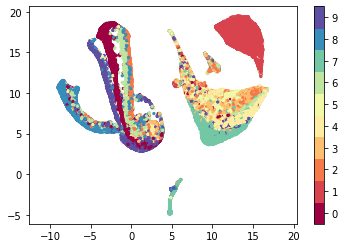

In [ ]:
reducer = umap.UMAP(random_state=314)
embedding = reducer.fit_transform(data)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

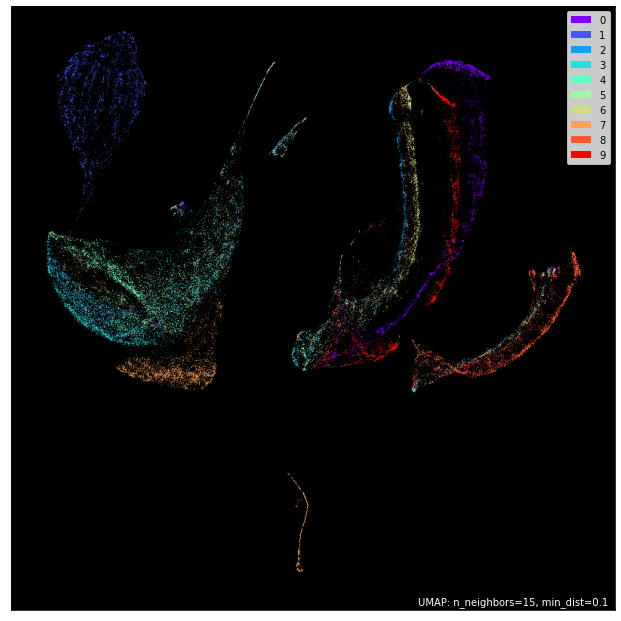

In [ ]:
umap_plot = umap.UMAP(random_state = 3142).fit(data)
umap_plot_2 = umap.UMAP(random_state = 3142).fit(data[:10000,:])
umap.plot.points(umap_plot, labels = digit, theme = 'fire')

In [ ]:
#from bokeh.plotting import figure, output_file, save
hover_data = pd.DataFrame({'label':digit[:10000]})
p = umap.plot.interactive(umap_plot_2, hover_data = hover_data, labels=digit[:10000])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train = data[:60000,:]
X_test = data[60000:,:]
Y_train = digit[:60000]
Y_test = digit[60000:]

In [ ]:
clf = RandomForestClassifier(n_estimators = 1000, random_state=314)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9717


In [ ]:
feature_imp = pd.DataFrame(data = {'0': clf.feature_importances_, '1': range(0,202)}).sort_values(by = ['0'], ascending=False)
featuresort = np.array(feature_imp['1'])
featuresort

In [ ]:
#UMAP of first 50 most important features
data_sub = data[:, featuresort[:110]]
X_train = data_sub[:60000,:]
X_test = data_sub[60000:,:]

In [ ]:
clf_1 = RandomForestClassifier(n_estimators = 1000, random_state=314)
clf_1.fit(X_train, Y_train)
Y_pred_1=clf_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_1))

In [ ]:
#Accuracy 50: 96.44
#Accuracy 90: 97.08
#Accuracy 100: 97.13
#Accuracy 110: 97.18
#Accuracy 120: 97.1
#Accuracy 150: 97.1

UMAP Plot with 110 vectors

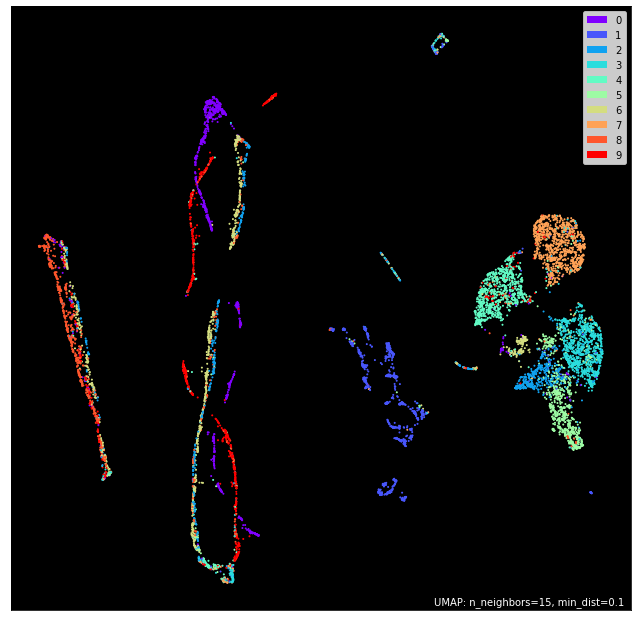

In [ ]:
#from bokeh.plotting import figure, output_file, save
#hover_data = pd.DataFrame({'label':digit[:10000]})
#umap_plot_2 = umap.UMAP(random_state = 3142).fit(data[:10000,featuresort[:110]])
umap.plot.points(umap_plot_2, labels = digit[:10000], theme = 'fire')